In [1]:
!which python

/Users/apabook/Desktop/challenge_02/venv/bin/python


In [2]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np

In [3]:
df = pd.read_csv("./../data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8148 non-null   int64 
 1   text    8148 non-null   object
 2   id      8148 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.1+ KB


In [14]:
import re
import string
import unicodedata
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from emoji import demojize

nltk.download('wordnet')
stop = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def lower_case(text: str) -> str:
    return text.lower()

def stemming(text: str) -> str:
    return " ".join([stemmer.stem(word=word) for word in text.split(" ")])

def lemmatizing(text: str) -> str:
    return " ".join([lemmatizer.lemmatize(word=word, pos="n") for word in text.split(" ")])

def remove_stopwords(text: str) -> str:
    return " ".join([word for word in text.split(" ") if word not in stop])

def noise_removal(text: str) -> str:
    text = re.sub(r'(\w+) \1', r'\1', text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\.\.\.", " ", text)
    text = re.sub(r"\"", " ", text)
    text = "".join([c for c in text if ord(c) < 128])
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    return text

def emoji_to_text(text: str) -> str:
    return demojize(text, language="en")

def cleaned_text(text: str) -> str:
    text = emoji_to_text(text)
    text = lower_case(text)
    text = noise_removal(text)
    text = remove_stopwords(text)
    return text

df["text_clean"] = df["text"].apply(cleaned_text)
df["text_lemma"] = df["text_clean"].apply(stemming)
df["text_lemma"] = df["text_clean"].apply(lemmatizing)
df["text_lemma"]

[nltk_data] Downloading package wordnet to /Users/apabook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       hi roy hope ok trans people gay also thing tha...
1                                fuckin hell even biology
2                            whose nice looking clergyman
3                             aid way sin consequence bad
4                                                   learn
                              ...                        
8143    yeah still alive athe time next election anyth...
8144                isomething fundamentally wrong withis
8145    always confused homosexuality big deal isnt pr...
8146                                           disgusting
8147    peter srensen note peter poor math 1327 equal ...
Name: text_lemma, Length: 8148, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english',ngram_range=(1,3))
tfidf_vect_model = tfidf_vect.fit(df["text_lemma"])
tfidf_lemma = tfidf_vect_model.transform(df["text_lemma"])

tfidf_lemma.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', ngram_range=(1,3))
count_vect_model = tfidf_vect.fit(df["text_lemma"])
count_lemma = tfidf_vect_model.transform(df["text_lemma"])

count_lemma.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
import spacy
nlp = spacy.load("en_core_web_lg")

df["text_vector_norm"] = df["text_lemma"].apply(lambda text: nlp(text).vector_norm) # ignore type
df["text_vector"] = df["text_lemma"].apply(lambda text: nlp(text).vector) # ignore type

In [35]:
df

,label,text,id,text_clean,text_lemma,text_vector,text_vector_norm
0,0,"Hi Roy hope you are ok, Trans people are not g...",95e98db99c2,hi roy hope ok trans people gay also thing tha...,hi roy hope ok trans people gay also thing tha...,"[-0.03587334, 1.208335, -2.0810654, -0.2705196...",21.283208
1,0,But fuckin' hell what even is biology,a87b8708e63,fuckin hell even biology,fuckin hell even biology,"[-0.27382252, 0.986485, -2.03915, -0.7261425, ...",26.809641
2,0,Whose the nice looking clergyman?,5b3cb03803f,whose nice looking clergyman,whose nice looking clergyman,"[-1.482125, 0.79149497, -1.8820226, -1.3315899...",26.068172
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND...",5b0bad2347e,aids way sin consequences bad,aid way sin consequence bad,"[-0.5262259, -0.09971602, -3.122306, -1.358966...",38.102923
4,0,to learn,332048bd188,learn,learn,"[2.7364, 0.92233, 1.0508, -5.2812, -3.5476, 3....",58.810325
...,...,...,...,...,...,...,...
8143,1,Yeah...if we still alive at the time of the ne...,9141edf7189,yeah still alive athe time next election anyth...,yeah still alive athe time next election anyth...,"[0.22625001, 1.1634922, -1.412366, -0.5060884,...",22.586422
8144,0,There is something fundamentally wrong with this,fde30735725,isomething fundamentally wrong withis,isomething fundamentally wrong withis,"[0.1238425, 0.633175, -0.5907475, -1.151625, -...",15.982473
8145,1,"This always confused me. If homosexuality is ""...",3d3456b6659,always confused homosexuality big deal isnt pr...,always confused homosexuality big deal isnt pr...,"[0.3465172, 4.457699, -3.6032543, -0.8684135, ...",34.024872
8146,1,disgusting,eace075fe4d,disgusting,disgusting,"[1.1455, -2.9189, -0.072817, -1.0632, 1.0148, ...",27.316607


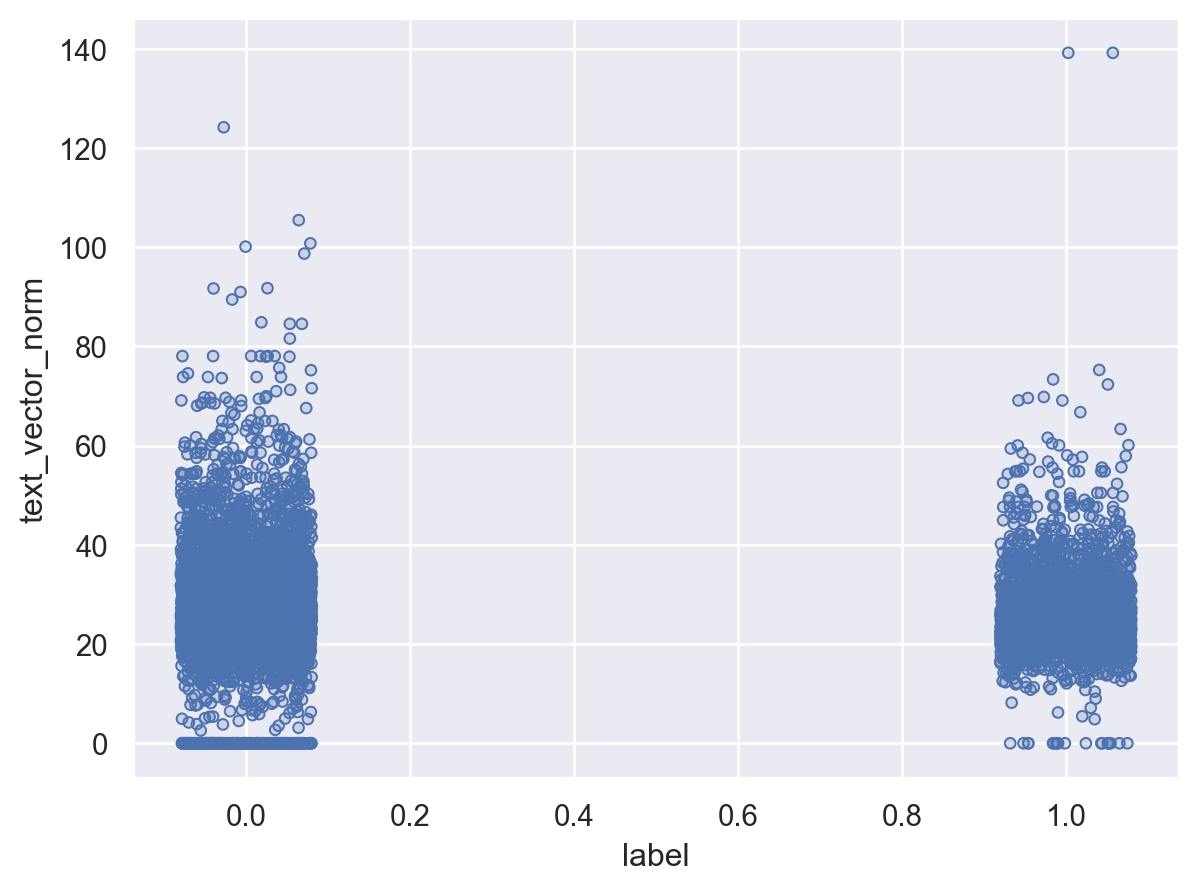

In [41]:
so.Plot(df, "label", "text_vector_norm")\
    .add(so.Dots(), so.Jitter())\
    .scale()